# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

### Objectives:

* Explore and analyze relationship/correlation between weather variables
* Train and evaluate a model to predict `MinTemp`

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load and check the dataset

We will load and visualize the first few results of the data frame (or further down it), in addition to other info that helps us grasp around what data we're working with.

In [2]:
# read .csv file
pd.set_option('display.max_columns', None)  # This is to prevent pandas from hiding middle columns, due to how wide the data frame display is
weather = pd.read_csv('Summary of Weather.csv')

weather.head()

C:\Users\deanc\AppData\Local\Temp\ipykernel_29028\1306263203.py:3: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv('Summary of Weather.csv')


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather[97465:97475]

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
97465,44401,1945-12-29,6.096,NaN,-3.888889,-5.555556,-4.444444,0.0,1,45,12,29,0.24,NaN,NaN,25.0,22.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
97466,44401,1945-12-30,0,NaN,-1.666667,-10.000000,-5.555556,0.0,NaN,45,12,30,0,NaN,NaN,29.0,14.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97467,44401,1945-12-31,T,NaN,-4.444444,-15.555556,-10.000000,0.0,1,45,12,31,T,NaN,NaN,24.0,4.0,14.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
97468,50301,1943-9-1,T,NaN,28.888889,23.333333,26.111111,0.0,NaN,43,9,1,T,NaN,NaN,84.0,74.0,79.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97469,50301,1943-9-2,21.59,NaN,25.555556,21.111111,23.333333,0.0,NaN,43,9,2,0.85,NaN,NaN,78.0,70.0,74.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97470,50301,1943-9-3,T,NaN,28.333333,22.777778,25.555556,0.0,NaN,43,9,3,T,NaN,NaN,83.0,73.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97471,50301,1943-9-4,0,NaN,27.777778,21.666667,24.444444,0.0,NaN,43,9,4,0,NaN,NaN,82.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97472,50301,1943-9-5,T,NaN,28.333333,23.333333,25.555556,0.0,NaN,43,9,5,T,NaN,NaN,83.0,74.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97473,50301,1943-9-6,T,NaN,28.333333,22.222222,25.555556,0.0,NaN,43,9,6,T,NaN,NaN,83.0,72.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97474,50301,1943-9-7,0,NaN,28.333333,23.333333,25.555556,0.0,NaN,43,9,7,0,NaN,NaN,83.0,74.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations:

1. Our float values like temp, all have recurring decimals. So we'll clean that off on next step, due to redundant value that takes up screen space.

2. We have many condensed named columns, that we'll have to figure out it's un-condensed form, as many are not as immediate as to what they represent.

3. Stations seem to record weather at different dates. `10001` Recorded from 1942-7-1, but `50301` records from 1943-9-1. Will need to figure out whether having aligned timeframes for all stations is an important feature or not.

4. A lot of `NaN` values, but some columns contain value `1`. Column most likely represent booleans, as it's likely there to signal whether i certain weather phenomenon occured that day or not.

5. `Precip` uses `T` with integer. Likely representing 'trace amounts of preceptation', aka almost close to 0 preciptation that day.

6. Few repeats of column with `Precip`, and `Date` split into `YR`, `MO`, `DA`.

7. `WindGustSpd` being strange, showing `NaN` like the boolean columns, yet should have integer values to represent wind gust speeds during that day.

9. `DtypeWarning` for columns of `Snowfall`, `PoorWeather`, `SNF`, `TSHDSBRSGF`. Probably a mix of different data types, so will need to check out later.

In [ ]:
weather.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


There are a number of columns whom have drastically less variables than the other, so could do without them during training. Can further double check with `.info()` as well to confirm these `null` columns.

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

That confirms our suspicions of `null` columns. I'll plan to remove columns that have under 500 non-null variables. Even though 500 represents only 0.5% of the rest of the data, it could be representation of an extremely rare weather event/phenomenon.

## 2. Correlate/Clean the dataset, drop variables

First, I will drop out the columns that have 0 variables in them. Then next correlate all values to `MinTemp` to see which columns are irrelevant, and which `MinTemp` is too highly dependant on.

In [3]:
# drop empty columns from data frame
weather = weather.drop(['FT','FB','FTI','ITH','SD3','RHX','RHN','RVG','WTE'], axis=1) # axis=1, is removing by column (1), instead of row (0)

We also got double precipitation columns, and will quickly check the difference between them.

In [4]:
# check preciptation variable difference, by looking at it's unique values
weather['Precip'].unique()[:10], weather['PRCP'].unique()[:10]

(array(['1.016', '0', '2.54', 'T', '3.556', '0.508', '0.254', '1.778',
        '3.302', '0.762'], dtype=object),
 array(['0.04', '0', '0.1', 'T', '0.14', '0.02', '0.01', '0.07', '0.13',
        '0.03'], dtype=object))

Results show `Precip` column, displaying `mm/hr` while `PRCP` displays `inch/hr`. As 1.016 mm/hr = 0.04 inch/hr, and 2.54mm/hr = 0.1 inch/hr.

We would keep the metric `Precip`, despite how the precipitation information gathered was `inch/hr`, and then converted to `mm/hr` (This is Due to how the metric record is all in 3 decimal points. Which is unusual to keep such detailed track of precipitation). 

Another reason, is the temperature is measured in celsius instead of fahrenheit, metric over imperial. Those temperatures in fahrenheit would signal the stations to be very cold, and not have much variation in temperature throughout the year, which would be very unusual.

In [5]:
# drop PRCP
weather = weather.drop(['PRCP'], axis=1)

Date column can also be removed, as we have that implemented through integers of year, month, and day, as separated columns. This is detail that the ML model can train on, whilst the date object column is untrainable, due to it not being numerical/boolean.

In [6]:
# drop Date
weather = weather.drop(['Date'], axis=1)

Let's look at the data frame data types

In [ ]:
# check rest of data frame's data type
weather, weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Precip       119040 non-null  object 
 2   WindGustSpd  532 non-null     float64
 3   MaxTemp      119040 non-null  float64
 4   MinTemp      119040 non-null  float64
 5   MeanTemp     119040 non-null  float64
 6   Snowfall     117877 non-null  object 
 7   PoorWeather  34237 non-null   object 
 8   YR           119040 non-null  int64  
 9   MO           119040 non-null  int64  
 10  DA           119040 non-null  int64  
 11  DR           533 non-null     float64
 12  SPD          532 non-null     float64
 13  MAX          118566 non-null  float64
 14  MIN          118572 non-null  float64
 15  MEA          118542 non-null  float64
 16  SNF          117877 non-null  object 
 17  SND          5563 non-null    float64
 18  PGT          525 non-nul

(          STA Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp Snowfall  \
 0       10001  1.016          NaN  25.555556  22.222222  23.888889      0.0   
 1       10001      0          NaN  28.888889  21.666667  25.555556      0.0   
 2       10001   2.54          NaN  26.111111  22.222222  24.444444      0.0   
 3       10001   2.54          NaN  26.666667  22.222222  24.444444      0.0   
 4       10001      0          NaN  26.666667  21.666667  24.444444      0.0   
 ...       ...    ...          ...        ...        ...        ...      ...   
 119035  82506      0          NaN  28.333333  18.333333  23.333333      0.0   
 119036  82506  9.906          NaN  29.444444  18.333333  23.888889      0.0   
 119037  82506      0          NaN  28.333333  18.333333  23.333333      0.0   
 119038  82506      0          NaN  28.333333  18.333333  23.333333      0.0   
 119039  82506      0          NaN  29.444444  17.222222  23.333333      0.0   
 
        PoorWeather  YR  MO  DA  DR  S

We have a few object columns. We will need to figure out what kind of data are in these columns, as we can't use it to correlate with `MinTemp` due to not being integers/floats.

In [7]:
weather['Snowfall'].unique()[:20], weather['Precip'].unique()[:20], weather['PoorWeather'].unique()[:20], weather['SNF'].unique()[:20], weather['TSHDSBRSGF'].unique()[:20], weather['STA'].dtype

(array([0.0, nan, '0', '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
        '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
        '43.18', '38.1', '45.72', '53.34'], dtype=object),
 array(['1.016', '0', '2.54', 'T', '3.556', '0.508', '0.254', '1.778',
        '3.302', '0.762', '5.588', '5.08', '2.032', '25.654', '40.132',
        '19.05', '23.876', '4.064', '12.192', '2.794'], dtype=object),
 array([nan, '1', '1     1', '1 1', '1     1  1', '1  1', '1        1',
        '0', '1   1 1', '1    1', '1     0', '1000', '1001', '100000',
        '1000001000', '101000', '101001', '1000001001', '1000101001',
        '100001'], dtype=object),
 array([0.0, nan, '0', '0.9', '1.3', '1.2', '0.1', '0.2', '0.4', '0.3',
        '0.8', '0.6', '0.7', '0.5', '1', '1.1', '1.7', '1.5', '1.8', '2.1'],
       dtype=object),
 array([nan, '1', '1     1', '1 1', '1     1  1', '1  1', '1        1',
        '0', '1   1 1', '1    1', '1     0', '1000', '1001', '100000',
        '1000001000', '

Seems like all object columns are floats and integer data types, but seem to have `nan` in the way, and make it invalid to become integer/float column. `T` is for trace amounts of rain in precipitation instead. So we'll need to replace these variables.

`nan` = Will be set as 0. Since there is no data present in here to signal the type of weather or condition, it likely means there is 'none' of that type of weather or condition during the time.

`T` = Will set as 0.01. Trace is minimal if no precipitation, so it's an very small value of rain that's hard to calculate accurately. 0.01mm/hr is a very light drizzle, and is considered 'trace'.

### Double columns
It also seems that `PoorWeather` and `TSHDSBRSGF` are the same column, based on the binary like values, being an exact copy in the same order. So we will keep `PoorWeather`, and remove the latter.

In [8]:
# remove poorweather duplicate
weather = weather.drop(['TSHDSBRSGF'], axis=1)

Time to replace `nan` = 0, and `T` = 0.01

In [9]:
# replace non string elements
weather['Snowfall'] = weather['Snowfall'].replace(['nan', '#VALUE!'], 0).astype(float) # errored, as it had '#VALUE!' instead of nan as well
weather['Precip'] = weather['Precip'].replace(['T'], 0.01).astype(float)
weather['PoorWeather'] = weather['PoorWeather'].replace(['nan'], 0).astype(float)
weather['SNF'] = weather['SNF'].replace(['nan'], 0).astype(float)

weather.info()

ValueError: could not convert string to float: '1     1'

We got an issue with `PoorWeather's` number formatting. From looking at the first 20 unique values above, it has spaced out values of 1s and 0s, likely indicating a form of binary. I will need to take a closer look at this, and continue with the conversions without `PoorWeather`.

In [10]:
weather['Snowfall'] = weather['Snowfall'].replace(['nan', '#VALUE!'], 0).astype(float)
weather['Precip'] = weather['Precip'].replace(['T'], 0.01).astype(float)
weather['SNF'] = weather['SNF'].replace(['nan'], 0).astype(float)

ValueError: could not convert string to float: 'T'

### Double Snowfall column
Found out there's another double column like precipitation, namely `SnowFall` with `SNF`. That column includes `T`, like trace in precipitation. I realized there must be a connection somewhere, and comparing `Snowfall` to `SNF`... 22.86 mm/hr = 0.9 inch/hr, and 30.48 mm.hr = 1.2 inch/hr

That would also explain the `#VALUE!` error, as the T in trace is trying to convert itself from inch/hr to mm/hr, but couldn't as it was not a numerical variable. So we will need to convert `#VALUE!` to 0.01, to match trace in precipitation.

Let's remove `SNF`, and redo the two columns

In [11]:
# remove SNF
weather = weather.drop(['SNF'], axis=1)

# replace wrong values
weather['Snowfall'] = weather['Snowfall'].replace(['nan'], 0).replace(['#VALUE!'], 0.01).astype(float)
weather['Precip'] = weather['Precip'].replace(['T'], 0.01).astype(float)

Let's look at all unique values inside `PoorWeather`

In [12]:
weather['PoorWeather'].unique()

array([nan, '1', '1     1', '1 1', '1     1  1', '1  1', '1        1',
       '0', '1   1 1', '1    1', '1     0', '1000', '1001', '100000',
       '1000001000', '101000', '101001', '1000001001', '1000101001',
       '100001', '1000000000', '1000101000', '1010001000', '1000100000',
       '1000100001', '1010001001', '10001001', '11', '11 1', '11    1',
       '1100000', '1 1  1', '1 0  1', '1 0', '1   1 1  1', '1000000',
       '1101000', '1101001', '1   1', 1.0], dtype=object)

My hypothesis to this, is it could be some form of one hot encoding, collapsed into one column. Each indexed value is meant to say what type of poor weather is present or not. And my guess, is the blank spaces that are observed mostly with 1s, are supposed to be 0s in between them.

So I will set all 'nan' to 0, and change all instances of blank spaces into 0s, to try and preserve the information within, but still make it a numerical column for model training.

In [13]:
# change nan to 0 and convert it to string
weather['PoorWeather'] = weather['PoorWeather'].replace(['nan'], 0).astype(str)

# replace any blank space with '0'
weather['PoorWeather'] = weather['PoorWeather'].apply(lambda x: '0' if ' ' in x else x) # lambda > a quick throwaway function. We've attached it to every singular value in 'PoorWeather', and compare it to our rule

# convert back to float
weather['PoorWeather'] = weather['PoorWeather'].astype(float)

In [15]:
weather

,STA,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,PGT
0,10001,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,NaN,NaN,78.0,72.0,75.0,NaN,NaN
1,10001,0.000,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,NaN,NaN,84.0,71.0,78.0,NaN,NaN
2,10001,2.540,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,NaN,NaN,79.0,72.0,76.0,NaN,NaN
3,10001,2.540,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,NaN,NaN,80.0,72.0,76.0,NaN,NaN
4,10001,0.000,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,NaN,NaN,80.0,71.0,76.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,0.000,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,12,27,NaN,NaN,83.0,65.0,74.0,NaN,NaN
119036,82506,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,12,28,NaN,NaN,85.0,65.0,75.0,NaN,NaN
119037,82506,0.000,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,12,29,NaN,NaN,83.0,65.0,74.0,NaN,NaN
119038,82506,0.000,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,12,30,NaN,NaN,83.0,65.0,74.0,NaN,NaN


Oh, it seems like replacing our `nan` didn't work...

In [16]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Precip       119040 non-null  float64
 2   WindGustSpd  532 non-null     float64
 3   MaxTemp      119040 non-null  float64
 4   MinTemp      119040 non-null  float64
 5   MeanTemp     119040 non-null  float64
 6   Snowfall     117877 non-null  float64
 7   PoorWeather  34237 non-null   float64
 8   YR           119040 non-null  int64  
 9   MO           119040 non-null  int64  
 10  DA           119040 non-null  int64  
 11  DR           533 non-null     float64
 12  SPD          532 non-null     float64
 13  MAX          118566 non-null  float64
 14  MIN          118572 non-null  float64
 15  MEA          118542 non-null  float64
 16  SND          5563 non-null    float64
 17  PGT          525 non-null     float64
dtypes: float64(14), int64(4)

But at the very least, it's converted into floats now. Let's see how correlation works with the nan values instead, since this was the case with other columns that we have not touched yet.

In [14]:
# correlate all numerical/float columns toward MinTemp
# create dictionary of columns
numeric_data = weather[['STA','Precip','WindGustSpd','MaxTemp','MinTemp','MeanTemp','Snowfall','PoorWeather','YR','MO','DA','DR','SPD','MAX','MIN','MEA','SND','PGT']]
correlation_matrix = numeric_data.corr()
correlation_matrix.loc['MinTemp']

STA            0.059319
Precip         0.088460
WindGustSpd    0.311690
MaxTemp        0.878384
MinTemp        1.000000
MeanTemp       0.965425
Snowfall      -0.319215
PoorWeather   -0.048224
YR            -0.020733
MO             0.069078
DA            -0.002576
DR             0.525019
SPD            0.311690
MAX            0.872096
MIN            1.000000
MEA            0.966441
SND                 NaN
PGT            0.007828
Name: MinTemp, dtype: float64

The numbers are shown from a range of 1 to -1. 1 Being 100% correlated, and -1 being 100% negatively correlated.

### Redundant/Irrelevant columns
We got `MAX` `MIN` and `MEA`, which appears to be copies of temperatures min max and mean from the top. Therefore these can be removes, as they are duplicates. `SND` provided `NaN`, therefore it's not helpful for us. 

Any column that has a <0.01 correlation, aka <1% correlation. `PGT` will be removed from our data frame, as they're worth more dead than alive for the space they take up. However, I will keep `DA`, as it's the day of the month. This acts as a secondary index number to month, and it'd be much easier to keep track and visually plot them on graphs when needed.

### Highly dependant columns
We will have to remove `MaxTemp` and `MeanTemp` from the data, as it gives a lot away with the true minimum temperature. However the biggest reason for its removal, is if we're predicting the minimum temperature of the day based on weather variables, then realistically, you wouldn't have the true `MaxTemp` and `MeanTemp` as well, due to them being variables that are also in the future.

Our goal is understanding the relationship between different weather variables to the predicted `minimum temperature`. And daily temperatures aren't really weather variables like snow or thunderstorms.

In [15]:
# remove all the mentioned columns that are irrelevant or too dependant on MinTemp
weather = weather.drop(['MAX','MIN','MEA','SND','PGT','MaxTemp','MeanTemp'], axis=1)
weather

,STA,Precip,WindGustSpd,MinTemp,Snowfall,PoorWeather,YR,MO,DA,DR,SPD
0,10001,1.016,NaN,22.222222,0.0,NaN,42,7,1,NaN,NaN
1,10001,0.000,NaN,21.666667,0.0,NaN,42,7,2,NaN,NaN
2,10001,2.540,NaN,22.222222,0.0,NaN,42,7,3,NaN,NaN
3,10001,2.540,NaN,22.222222,0.0,NaN,42,7,4,NaN,NaN
4,10001,0.000,NaN,21.666667,0.0,NaN,42,7,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,0.000,NaN,18.333333,0.0,NaN,45,12,27,NaN,NaN
119036,82506,9.906,NaN,18.333333,0.0,1.0,45,12,28,NaN,NaN
119037,82506,0.000,NaN,18.333333,0.0,1.0,45,12,29,NaN,NaN
119038,82506,0.000,NaN,18.333333,0.0,NaN,45,12,30,NaN,NaN


Also round `MinTemp` and `Precip` to 1 decimal place to make it take less space up on the computer

In [16]:
# round MinTemp to 1 decimal place
weather['MinTemp'] = weather['MinTemp'].round(1)
weather['Precip'] = weather['Precip'].round(2)
weather

,STA,Precip,WindGustSpd,MinTemp,Snowfall,PoorWeather,YR,MO,DA,DR,SPD
0,10001,1.02,NaN,22.2,0.0,NaN,42,7,1,NaN,NaN
1,10001,0.00,NaN,21.7,0.0,NaN,42,7,2,NaN,NaN
2,10001,2.54,NaN,22.2,0.0,NaN,42,7,3,NaN,NaN
3,10001,2.54,NaN,22.2,0.0,NaN,42,7,4,NaN,NaN
4,10001,0.00,NaN,21.7,0.0,NaN,42,7,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,0.00,NaN,18.3,0.0,NaN,45,12,27,NaN,NaN
119036,82506,9.91,NaN,18.3,0.0,1.0,45,12,28,NaN,NaN
119037,82506,0.00,NaN,18.3,0.0,1.0,45,12,29,NaN,NaN
119038,82506,0.00,NaN,18.3,0.0,NaN,45,12,30,NaN,NaN


## 3. Select the feature(s) for the model, and explain the reason

Right now, I'm cross checking columns to better understand the abbreviated column names, and what they represent.

In [17]:
weather['DR'].unique(), weather['SPD'].unique()

(array([nan, 32., 44., 54., 34., 33., 22., 55., 12., 56., 78., 76., 77.,
        66.,  7.,  9., 29., 27., 25.,  5., 14., 16., 11., 20.,  2., 18.,
        23.]),
 array([nan, 16., 32., 27., 22., 28., 24., 31., 29., 23., 34., 37., 33.,
        25., 21., 30., 17., 20., 40., 35., 26., 19., 15., 18., 11., 12.,
        13., 14., 41., 36., 10.]))

In [21]:
weather['DR'].unique(), weather['Precip'].unique()[:20], weather['PoorWeather'].unique()

(array([nan, 32., 44., 54., 34., 33., 22., 55., 12., 56., 78., 76., 77.,
        66.,  7.,  9., 29., 27., 25.,  5., 14., 16., 11., 20.,  2., 18.,
        23.]),
 array([1.020e+00, 0.000e+00, 2.540e+00, 1.000e-02, 3.560e+00, 5.100e-01,
        2.500e-01, 1.780e+00, 3.300e+00, 7.600e-01, 5.590e+00, 5.080e+00,
        2.030e+00, 2.565e+01, 4.013e+01, 1.905e+01, 2.388e+01, 4.060e+00,
        1.219e+01, 2.790e+00]),
 array([          nan, 1.0000000e+00, 0.0000000e+00, 1.0000000e+03,
        1.0010000e+03, 1.0000000e+05, 1.0000010e+09, 1.0100000e+05,
        1.0100100e+05, 1.0000010e+09, 1.0001010e+09, 1.0000100e+05,
        1.0000000e+09, 1.0001010e+09, 1.0100010e+09, 1.0001000e+09,
        1.0001000e+09, 1.0100010e+09, 1.0001001e+07, 1.1000000e+01,
        1.1000000e+06, 1.0000000e+06, 1.1010000e+06, 1.1010010e+06]))

In [22]:
weather['SPD'].unique(), weather['WindGustSpd'].unique()

(array([nan, 16., 32., 27., 22., 28., 24., 31., 29., 23., 34., 37., 33.,
        25., 21., 30., 17., 20., 40., 35., 26., 19., 15., 18., 11., 12.,
        13., 14., 41., 36., 10.]),
 array([   nan, 29.632, 59.264, 50.004, 40.744, 51.856, 44.448, 57.412,
        53.708, 42.596, 62.968, 68.524, 61.116, 46.3  , 38.892, 55.56 ,
        31.484, 37.04 , 74.08 , 64.82 , 48.152, 35.188, 27.78 , 33.336,
        20.372, 22.224, 24.076, 25.928, 75.932, 66.672, 18.52 ]))

* **`YR`, `MO`, `DA`:** They represent the dates of when these data are recorded on paper, acting as a secondary index, that's much easier for humans to grasp/understand when we want to visualize it. Also, months carry crucial information about change in temperature, as it's a way to signal the change in season. You would expect July as hot in the Summer (On the Northern Hemisphere), and January as cold during Winter.

* **`Precip`, `Snowfall`:** Both forms of precipitation are a weather variable that contribute to change in temperature. As it's usually met with cloudy overcast, making it colder, and snowfall obviously occurs when temperature is close to below freezing as well. Both has some correlation to `MinTemp`.

* **`STA`:** Represents different localities, and where these weather stations are placed geographically. Not every station records the same exact temperature and weather, as there's an infinite amount of variables that come to play. Having station numbers, allows ML model to know what weather is to be expected at station `12345`.

* **`WindGustSpd`, `SPD`:** Both are one of the same, but measured in different ways. `SPD` is likely measuring the average wind speed during the day, and the latter measuring the strongest wind/gust during the day. Both are a form of weather variable, as poor weather and wind are quite linked together. Also they both have correlation to the `MinTemp`.

* **`DR`:** Is our strongest correlator to `MinTemp`. Despite that, I don't have an idea as to it's true meaning/terminology. Searches online say it can be duststorm/low-drift. But they are typically represented by binary terms, rather than numerical values. Main reason to keep it is due to how good `DR` correlates to `MinTemp`.

* **`PoorWeather:`** It has a very weak correlation to `MinTemp`, but I kept it as I think there's more to this column than simple correlation. It's comparing by value size to temperature, rather than comparing it by the binary instance. I believe ML could detect the patterns of the column's binary towards predicting the `MinTemp`, rather than seeing it as a number scale of sorts like wind speed.

## 4. Split the dataset (80% for training, 20% for testing)

Next, we need to split data into train and test sets for ML modelling.

In [18]:
# do train test splitting on data, with ratio 80/20
from sklearn.model_selection import train_test_split

X = weather.drop('MinTemp', axis=1) # remove target variable from x
y = weather['MinTemp'] # keep target variable separately

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## 5. Choose the algorithm, train and test the model

We will be using the below image to make a decision on which model we best should use to train. Here's the flow chart answers:
1. *>50 samples?* **Yes**
2. *Predicting categories?* **No**
3. *Predicting quantity?* **Yes**
4. *<100k samples?* **No**

Answer: **SGD Regressor** 

![alt text](ml_map.png)

### What is SGD Regressor?

Stochastic Gradient Descent Regressors, reduces discrepancy between target values and anticipated values by optimizing the model's parameters. It's useful in case scenarios where datasets are big, as it's computationally efficient. It also avoids overgitting/enhance generalization through incorporating strategies like L1 (Lasso), and L2 (Ridge regularization). 

The way it does L1, is shrinking unimportant features close to 0 to save computation power based on L1's penalty, while selecting the most significant features. L2, is where coefficients are squared, making large errors more penalty heavy compared to small errors. 

### Model 1

We will start off, by fitting the model itself onto the data, and use it as our baseline to figure out what steps we take next

In [24]:
# fit sgd regressor onto data
from sklearn.linear_model import SGDRegressor

model=SGDRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: Input X contains NaN.
SGDRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Oops, we have NaN values that must be rid of, as the model doesn't accept it. We'll quickly make those changes and set them to 0.

In [19]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
# fit sgd regressor onto data
from sklearn.linear_model import SGDRegressor

model=SGDRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

-1.1861393814253438e+47

Oops, the model performed horribly. One important step I missed was scaling the features, so all of them are normalized for the model. SGD Regressor doesn't like when every single feature has a very different scale to each other.

We should also set a `random_state` for SGDRegressor, so that the way it trains on the data is equally the same in all variations of the model. This way, results are consistent and we can compare/contrast the results.

In [33]:
# add StandardScaler to X dataset
from sklearn.preprocessing import StandardScaler

# scale X data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler/normalization to X_train
X_test_scaled = scaler.transform(X_test) # use X_train's scaler on X_test, so both are normalized the same amount

# train model
model = SGDRegressor(random_state=35)
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.10013511290826049

Results definitely look better. Let's also create a function with a few evaluation metrics to better gauge on accuracy

In [20]:
# create evaluation metric function
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}\nMean Absolute Percentage Error: {mean_absolute_percentage_error(y_test,y_pred)}\nMean Squared Error: {mean_squared_error(y_test,y_pred)}\nR2 Score: {r2_score(y_test,y_pred)}')


In [ ]:
evaluate(model, X_test_scaled, y_test)

Mean Absolute Error: 5.907234623435148
Mean Absolute Percentage Error: 313679858266089.25
Mean Squared Error: 63.59856287202859
R2 Score: 0.10589531965774046


### Result interpretation:

**Mean Absolute Error:** Shows the average magnitude of the errors in predictions, indicated by the same unit as our target variable (Celsius). With a 5.91, that means our prediction is on average, 5.91 celsius off from target.

**Mean Absolute Percentage Error:** The average error as a percentage of the actual values. 3.13e14% is way too high. What is likely happening, is celsius can reach 0 degrees. And when ML model is predicting any value other than 0, it will return an inf% difference, which will heavily skew the data wrong. So we will likely remove MAPE, due to unsuitability with data.

**Mean Squared Error:** The average squared difference between prediction and truth. Similar to MAE, but punishes large errors much heavily, due to squaring.

**R squared score:** Says how well the model explains the variance in the target variable. Example, if R2 = 1 > then it's a perfect fit. R2 = 0 > model does no better than y's mean. R2 < 0 > model is worse than pure guessing. Result of 0.106, indicate that the model explains 10.6% of variation in minimum temperature. Not good, but better than 0.

In [21]:
# remove MAPE from evaluate function
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}\nMean Squared Error: {mean_squared_error(y_test,y_pred)}\nR2 Score: {r2_score(y_test,y_pred)}')


### Model 2 - finding ideal alpha, eta0 and penalty

We'll start simple with model tuning, by finding ideal alpha (regularization strength) eta0 (initial learning rate), and penalty (regularization technique). They are like the bread and butter of the model, and we can compound it on top of other parameters.

How we will do this is using `GridSearchCV`, stating multiple different variables for each, and have the model run through all possible variations to find the best one.

### Applying Cross Validation

Cross validation is the `cv` parameter in our `grid` code. What it does is, training the model on different train and validation splits within the training data. Aka, `cv` creates it's own model training/testing grounds, using the available training data. The number we specify for `cv`, means how many different slices of training and validating we want the model to train on. Using 5, the model creates 5 training and validating splits, all spliced differently from each other. Then the score of each slice is then averaged into one result, from 5 to 1.

This helps a lot with generalization and comparing multiple models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# define parameter grid for gridsearchcv
param_grid = {
    'sgdregressor__alpha': [1e-5, 1e-4, 1e-3, 1e-1, 1],
    'sgdregressor__eta0': [0.0001, 0.001, 0.01, 0.1],
    'sgdregressor__penalty': ['l2', 'l1', 'elasticnet']
}

# create pipeline so standardization is applied in every cv split of data
pipe = make_pipeline(StandardScaler(), SGDRegressor(learning_rate='constant', max_iter=1000, tol=1e-3, random_state=35))
                                                    # learning_rate uses a fixed value during training. shifting in lr would do little to help with learning
                                                    # max iterations/epoch for training over the same model
                                                    # tol > tolerance to when to stop training early. If value is smaler than tol, the model stops training.

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) # n_jobs=-1 > using all available cpu cores
grid.fit(X_train, y_train)

print('Best Parameters:', grid.best_params_)
print('Best Score:', grid.best_score_)

Best Parameters: {'sgdregressor__alpha': 0.001, 'sgdregressor__eta0': 0.0001, 'sgdregressor__penalty': 'l1'}
Best Score: -61.59770294927846


**Score meaning:** Negative mean squared error, is basically MAE but negative. With a value of 61.59, it's marginally better than when we did nothing to it (63.59). However, this was only done on the train dataset. Let's see the results with test data, using our `evaluate` function.

In [ ]:
# use model 2 on evaluation function
evaluate(grid,X_test_scaled,y_test)

Mean Absolute Error: 7.125927792652582
Mean Squared Error: 113.79227140440415
R2 Score: -0.5997563129559622


x:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Seems like the model is performing worse with these parameters. Worse than if mean was predicted.

### Model 3 - Try other parameters

Now let's try again differently with many other parameters altogether instead. Maybe the chosen alpha, eta0 and penalty will be different this time, based on other parameters as sometimes others work well with each other. The values are supplemented from suggestions made from ChatGPT.

In addition, we will use `RandomizedSearchCV` instead of `GridSearch`. This is because of the amount of parameters I'm using to supplement the model, and this will take a lifetime to train the model, if we're going through each options one by one. Instead, I'll have the model randomly pair parameters up, for up to 100 different times to save on time, but give us enough variety.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# create directionary with extensive parameters
params = {
    'sgdregressor__loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'sgdregressor__penalty': ['l1', 'l2', 'elasticnet'],
    'sgdregressor__alpha': [0.0001, 0.001, 0.01],
    'sgdregressor__eta0': [0.01, 0.05, .01],
    'sgdregressor__learning_rate': ['constant', 'adaptive', 'optimal', 'invscaling'],
    'sgdregressor__l1_ratio': [0.15, 0.5, 0.9],
    'sgdregressor__power_t': [0.25, 0.5],
    'sgdregressor__early_stopping': [True],
    'sgdregressor__epsilon': [1.35, 0.1, 0.5]
}

model3 = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3, random_state=35))
random_search = RandomizedSearchCV(model3, param_distributions=params, n_iter=100, cv=5, scoring='r2', random_state=35, n_jobs=-1)
random_search.fit(X_train, y_train)

print(random_search.best_params_)
print(random_search.best_score_)

{'sgdregressor__power_t': 0.25, 'sgdregressor__penalty': 'l2', 'sgdregressor__loss': 'squared_error', 'sgdregressor__learning_rate': 'adaptive', 'sgdregressor__l1_ratio': 0.5, 'sgdregressor__eta0': 0.01, 'sgdregressor__epsilon': 0.5, 'sgdregressor__early_stopping': True, 'sgdregressor__alpha': 0.001}
0.10755325796185729


Wow, it seems that it can barely improve if at all. A 0.107 r squared to a model that's simply `SGDRegressor()` giving 0.106

In [ ]:
evaluate(random_search,X_test_scaled,y_test)

Mean Absolute Error: 6.90691620243333
Mean Squared Error: 109.95597429573802
R2 Score: -0.545823471628341


x:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


And yet, test data shows it performing worse than mean predictions. I think a good idea to see what is going on, is visually plot the predicted mintemp, to the true mintemp. Then plot a dashed line to show the location of where predicted and true mintemp should meet up.

I will use model3 for our first visual

x:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


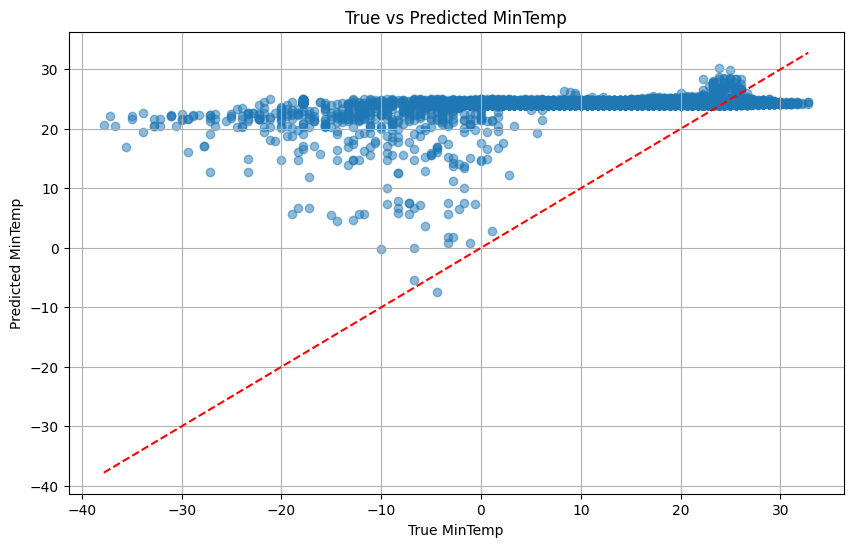

In [173]:
# create a grpah to compare predicted and true mintemp values
import matplotlib.pyplot as plt

y_pred = random_search.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("True MinTemp")
plt.ylabel("Predicted MinTemp")
plt.title("True vs Predicted MinTemp")
plt.grid()
plt.show()


Next, let's have a look at model1, since this r squared result is the best out of all 3.

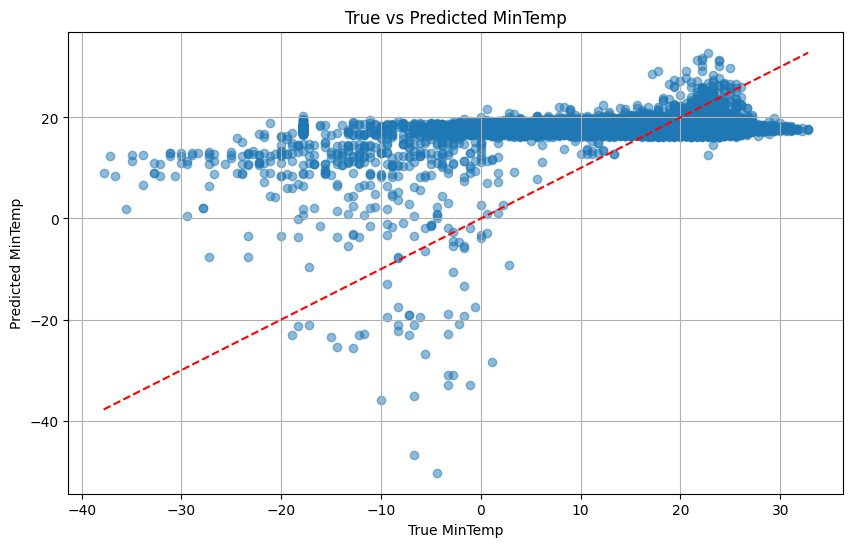

In [174]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("True MinTemp")
plt.ylabel("Predicted MinTemp")
plt.title("True vs Predicted MinTemp")
plt.grid()
plt.show()


Wow, it looks like the model actually performs at it's best when you call the optimization technique by itself, making all tuning pointless...

### Why is SGD so useless?

The likely biggest factor is its 'linearity'. Despite being recommended for big data sets with regression problems, it can't detect patterns that have something like sine or cosine waves (which is something we often observe in temperatures as the month changes.)

In this case, we will switch for a new optimizer that has the ability to capture non-linear patterns, like `RandomForestRegressor`.

### What is `RandomForestRegressor`?:

Its a learning algorithm that's based on decision trees. The data is fitted upon many decision trees, that traverse through specific branches, based on features that each splitting branch picks up on. Once it's done fitting down to a prediction, it averages all predictions to get a more accurate and robust result.

As it's a random forest, it builds many trees that target random subsets of data/features, before averaging the output. The mutiple trees, help reduce overfitting and increase generalization.

As a regression task,  each tree outputs a number, and the forest averages them out.

Now let's implement `randomforestregressor` and use it by itself.

### Model 4: Use `RandomForestRegressor`

In [23]:
# fit randomforest onto data
from sklearn.ensemble import RandomForestRegressor

model4=RandomForestRegressor()
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

0.9564732571201014

Awesome, now let's check it's other metrics with our evaluate function

In [24]:
# evaluate model on function
evaluate(model4, X_test, y_test)

Mean Absolute Error: 1.1073524025537633
Mean Squared Error: 3.049627098454301
R2 Score: 0.9564732571201014


Knowing what R2 score is, where 1 = matching one to one with prediction and truth, while 0 = prediction is no better than guessing pure mean. A value of 0.956 makes this model extremely promising right off the bat.

Our next step is probably double checking the results of prediction with truth, by plotting it on the graph with the dotted line, showing where the prediction and truth `mintemp` should align.

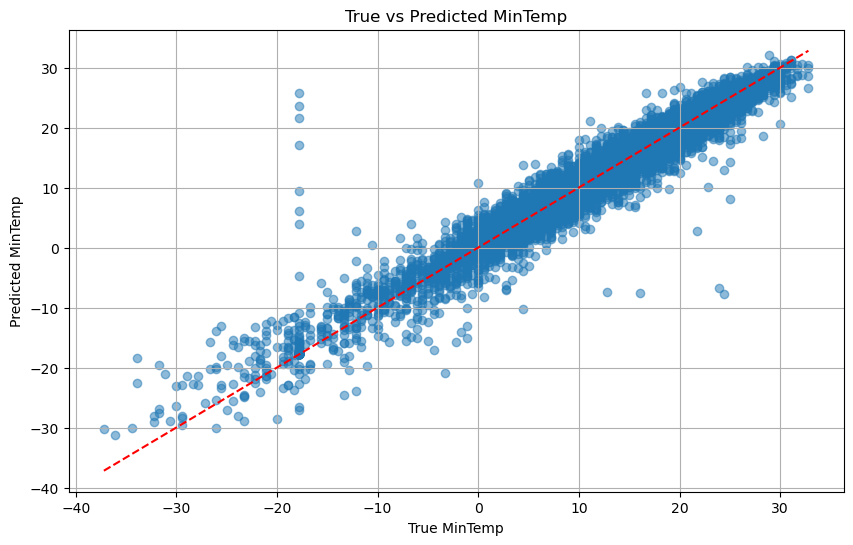

In [42]:
# create a grpah to compare predicted and true mintemp values
import matplotlib.pyplot as plt

y_pred = model4.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("True MinTemp")
plt.ylabel("Predicted MinTemp")
plt.title("True vs Predicted MinTemp")
plt.grid()
plt.show()


Looks much better this time! Let's see if we can further improve upon this model just a little bit more.

### Model5: Use RandomizedSearchCV

We will go through a grid of different parameter settings suggested by ChatGPT, and use `RandomizedSearchCV` over `GridSearchCV`. Mostly due to computing expenses, as training `RandomForestRegressor` by itself took 23 seconds. Imagine having to train every single iteration by half a minute, and needing to do that a hundred times to go through all posibilities in a parameter grid. That ain't intelligent use of resources for the minute improvements made.

In [ ]:
# perform gridsearchcv on randomforestregressor

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['sqrt','log2',0.8],
    'bootstrap':[True,False]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=35),
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=2,
    n_jobs=1 # this controls cpu core usage for training. 1 = using 1 core. The training was crashing due to using too many cores simultaneously
)

random_search.fit(X_train, y_train)
print('Best r2:', grid.best_scores_)
print('Best Params:', grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   9.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.7s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.6s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.7s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   8.6s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_e

x:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "x:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "x:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "x:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\ensemble\_forest.py", line 486, in fit
    trees = Parallel(
  File "x:\Anaconda3\envs\tf_gpu\lib\site-packages

AttributeError: 'GridSearchCV' object has no attribute 'best_scores_'

In [ ]:
print('Best R²:', random_search.best_score_)
print('Best Params:', random_search.best_params_)

Best R²: 0.9471138708167747
Best Params: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': None, 'bootstrap': False}


In [25]:
evaluate(model4, X_test, y_test)

Mean Absolute Error: 1.1073524025537633
Mean Squared Error: 3.049627098454301
R2 Score: 0.9564732571201014


Well seems like `RandomizedSearchCV` was as useful as it was with `SGDRegressor`. Which meant that it's not at all useful to us :(


### Model 6: Try scaling on randomizedforest

Since we used scaling and normalization on the data because that was what made the `SGDRegressor` work. So let's try applying the scaled data on `RandomForestRegressor`, and see the results.

In [34]:
# train RandomForestRegressor on scaled data with the parameters from randomized search

model6 = RandomForestRegressor(random_state=35)

model6.fit(X_train_scaled,y_train)
model6.score(X_test_scaled,y_test)

0.9566673600665001

Scaled data only marginally help. But given it's low cost with training, we'll keep it for the time being

### Model 7: Feature engineer Month Sine and Cosine

We will engineer two new features for month using sine and cosine. Both are transformed into a cyclical feature, where it follows on a circle. Why do that? It's because of how seasons work on a cyclical nature, but the values that make each month may make it hard for models to recognize the patterns.

Despite December (12) follows before January (1), the values are at the largest difference. Which can cause confusion by the model.

Using `sin/cos` solves the issue by being able to place the month around a circle. A lot like a clock

![alt text](be78405a-ccf7-4e4f-9126-c70a4b87221d.png)

This image is an example of how the month are placed in 2D space, plotted from code written by chatgpt.

In [38]:
# create sin and cos cyclical features for train and test data
X_train['Month_sin'] = np.sin(2 * np.pi * X_train['MO'] / 12)
X_train['Month_cos'] = np.cos(2 * np.pi * X_train['MO'] / 12)

X_test['Month_sin'] = np.sin(2 * np.pi * X_test['MO'] / 12)
X_test['Month_cos'] = np.cos(2 * np.pi * X_test['MO'] / 12)

# rescaled the data again
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model7=RandomForestRegressor(random_state=35)

model7.fit(X_train_scaled,y_train)
model7.score(X_test_scaled,y_test)

0.9566673600665001

Seems like the extra month cos and sin columns didn't do anything to the training of the model.

### Model 8 - Increase n_estimators

What `n_estimators` do is creating more trees. Having more trees create more stability, and also the possibility for better generalization, which can mean better results. Let's try 500 estimators

In [ ]:
# set model with 500 n_estimators
model8=RandomForestRegressor(n_estimators=500, random_state=35, n_jobs=-1) # n_jobs=-1 to make our training faster with cpu core use

model8.fit(X_train_scaled,y_train)
model8.score(X_test_scaled,y_test)

0.9567465755523822

A marginal increase in training. It seems we're already reaching the boundary of the model's capability. 

### Model 9 - 2000 n_estimators

I think for the last ditch attempt for improvement is to push n_estimators way higher to 2000, and see what comes of it.

In [43]:
# set model with 2000 n_estimators
model9=RandomForestRegressor(n_estimators=2000, random_state=35, n_jobs=-1) 

model9.fit(X_train_scaled,y_train)
model9.score(X_test_scaled,y_test)

0.9568578596337731

An increase of 1 minute in training the model, for a 0.0001 increase in r2 score, is a very expensive tradeoff. `Model9` will become our final model for this data.

## 6. Evaluate and Visualize model Performance

Let's firstly call in the `evaluate` function and see the results.

In [ ]:
# use evaluate function to show our scores
evaluate(model9, X_test_scaled, y_test)

Mean Absolute Error: 1.0982499516969084
Mean Squared Error: 3.0226805784478965
R2 Score: 0.9568578596337731


`Mean Absolute Error` > States the average error by celsius. The result, states that the model on average is 1 degree off from the actual minimum temperature.

`Mean Squared Error` > Is the squared error, which is then averaged out. This penalises large errors, and the result is 3. If we extrapolate `MSE` from square root of 4 = 2, and is lower than 4 but higher than 1  (sqrt1 = 1), shows the model has some high errors in prediction, but overall still keeps it's errors quite low.

`R2 Score` > Score of 1 = exact prediction, 0 = prediction no better than predicting the mean. A result of 0.9568 is very close to the true minimum temp values.

### Compare prediction and true min_temp

We've visualized the data previously. Now let's reuse the code on `model9`

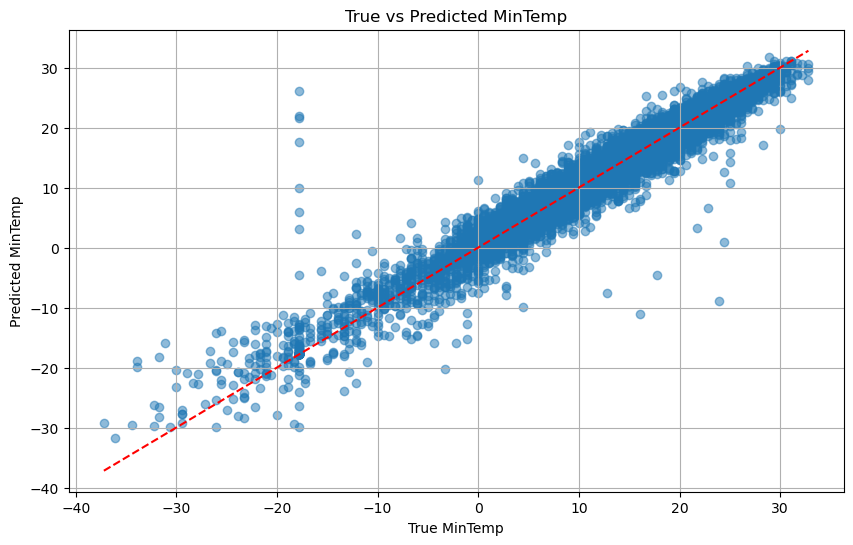

In [50]:
# create a grpah to compare predicted and true mintemp values
import matplotlib.pyplot as plt

y_pred = model9.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("True MinTemp")
plt.ylabel("Predicted MinTemp")
plt.title("True vs Predicted MinTemp")
plt.grid()
plt.show()

#### Observations:

There's a very striking straight line on the graph, showing how the model has predicted a variety of temperatures. But true temperature around -18c was the same all across them. I'm not too sure what anomaly can cause this. It could be a malfunction in the instruments that recorded the minimum temperature, and used -18c as the placeholder/default value, while other information like station numbers and dates remain factual.

That straight line could also be a big factor to how big our `MSE` value is.

Distribution of the dots are quite stable from 30 to -10c. Where there's about an equal portion of underestimation to the portion of overestimation. But below -10c, the prediction by the model is a lot more varied. This is most likely due to how little data there are that represented temperatures in these area. Which made it harder for the model to generalize and learn patterns from sparse data. 

While the distribution is equal amongst 30 to -10c, the model generally 'overpredicts' temperature from -10c and below. This is most likely due to a stronger representation in temperatures between 30 to -10c, and in addition to such temperatures with extreme lows being quite strong outliers. Naturally the model will predict higher, based on what it has often seen being represented in data.

### Display residual/error plot

We can see how the errors of the model prediction are distributed, by graphing the model's prediction in `mintemp`, against the value difference to the true `mintemp`.

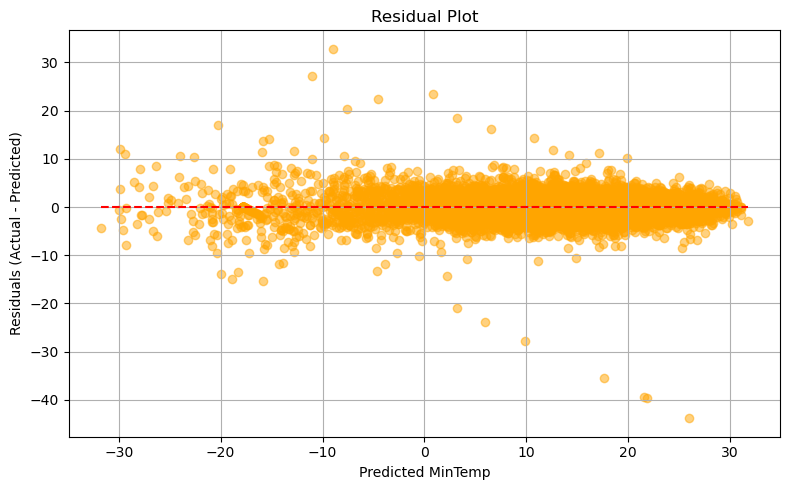

In [51]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
plt.hlines(0, y_pred.min(), y_pred.max(), colors='red', linestyles='--')
plt.xlabel("Predicted MinTemp")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


### Observations

That diagonal line represents the 'straight line' we saw in the `prediction vs true mintemp`. It puts into perspective how large the error is as well, compared to the rest of the predicted data.

The distribution is pretty clear on this graph as well. With the model's prediction being more accurate in warmer temperatures from -10c to 30c, and struggling with anything below -10c due to the aforementioned issues from above.

We can also see a small amount of outliers where the predicted `mintemp` is >20 degree too low from the actual temperature. Not sure the cause of it, but may as well be from model's error in prediction.

### Feature Importance Graph

Let's check what column of data is most important for the model to learn patterns from. We did do feature importance at the start, but that was only based on the correlation of whether the changing in values in a specific column, will also change the value in the target variable.

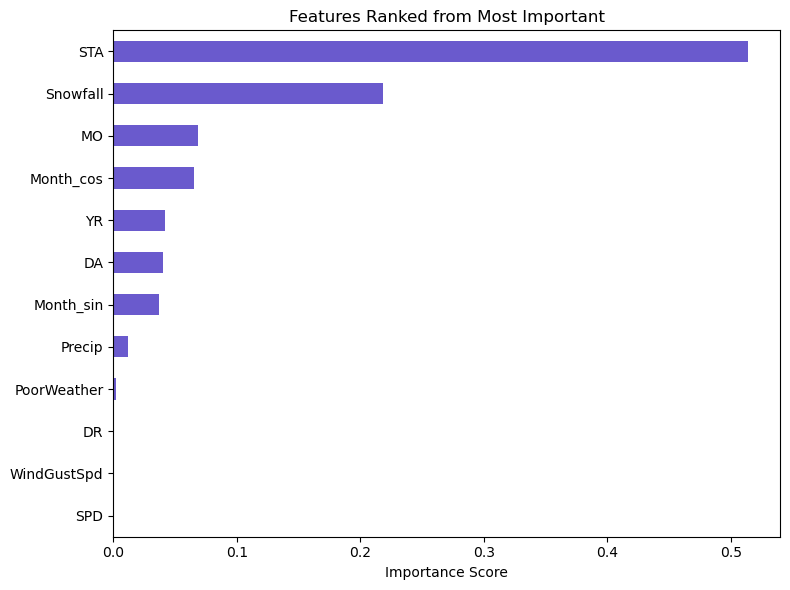

In [57]:
import pandas as pd

importances = model9.feature_importances_
features = X_train.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
feat_imp.plot(kind='barh', color='slateblue')
plt.title("Features Ranked from Most Important")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


`STA`, short for 'weather station' was most important, which makes sense. Each weather station are situated at a location on earth permanently. For every location, there are very specific weather and temperature patterns to those areas, and these patterns repeat often in an annual basis. This allows the weather and especially the temperature be somewhat predictable, if you know the past history of weather/temperature records of a specific weather station, you have a good idea on what future weather and temperature would be like.

`Snowfall` is next important, likely because it only really occurs below freezing. If snow doesn't occur, it likely means the temperature is too warm for it to form.

`Month Data` is also next important, likely due to seasonal changes. Due to the cyclical nature of months, and how every month has a similar pattern in temperature to its preceeding year, it allows some predictability of what the `mintemp` would be.

What was surprising was `DR` being the most correlated to `mintemp`. But when it was trained on `model9` and ranking it based on feature importance, it doesn't show up at all, and is mostly sitting redundant.

Seems like the wind datapoints had very little importance to the model. I personally assumed they may help, due to how bad weather often includes wind. And bad weather has an affect on the temperature, typically on making temperatures lower.

## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

### R2:
More proper definition of R2, is a metric that tells the user, how much of the variance/change inside 'y' data, could be explained by the data inside `X`. The scale of the score is percentage-wise, where 1 = 100%, and 0 = 0%. For example, if we get a score of 0.9, then 90% of the variable variation and change inside `Mintemp`, can be explained from features like Month, Station, or Weather data. The other 10% of the data is unexplained possible randommness, or other variables that aren't measured in `X` data.

Where the model is = to 0, or 0%, the model is inable to explain any variable variation/change in `Mintemp`. This is the equivalent to the model simply predicting the average values of `y` data. R2 can also go in the negative by making prediction that are further from the mean, turning to something more like a MAE/MSE-like metric. Negative R2, often indicate poor generalization or possible overfitting.

With our r2 metric being 0.9568, the model can explain the 95.68% of the variation inside `Mintemp`, with a very tiny proportion of the data being randommness or lack of features/data from `X`. So the overall model has a very strong fit and does generalization well on unseen data.

### RMSE:

We haven't added that to our evaluation model, so we'll quickly see what the metric result is and explain it

In [62]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 1.738585798414302


`RMSE` is similar, conept-wise to `MSE`. But it has a different use case compared to `RMSE`. Both metrics use `squared` when calculating the error between prediction and truth variable. This helps penalize large errors more than smaller ones, making it more sensitive to outliers. Compare it to `MAE`, which basically applies the `.abs` (absolute) function over the prediction with the truth, and return the average difference from prediction to truth.

Comparing `RMSE` to `MSE`, the latter is more useful during optimization or model training. This is due to it being much more harsher on large outlier errors. For the former, it has the `root squared` operation applied over it's metric, making the error values a bit more 'softer', but also it brings the values back to it's original scale, while still being more punishing than `MAE`. This makes it useful for human interpretation and for visual communication/presentation.

For human interpretation, we can try compare it to the `MAE` value of our model.

In [64]:
from sklearn.metrics import mean_absolute_error

rmse = mean_absolute_error(y_test, y_pred)
print("Mean Average Error (MAE):", rmse)

Mean Average Error (MAE): 1.0982499516969084


What we know is `MAE` is equal to 1.09, aka for every prediction made, the value of prediction is on average 1.09 celsius away from the true `Mintemp`. Given our data ranges from round -40 to 30c making a variation of 70 degrees, a 1/70th difference from min/max (1.56%) is extremely good and quite accurate in itself.

Now comparing it to `RMSE`, we have a value fo 1.73. It's obvious that the value is larger than `MAE`, due to the affect of larger outliers having an influence on the final metric value. We can 'extrapolate' meaning by treating it as the 'new' `MAE` and say its 1.73 celsius away from true `Mintemp` for every prediction that's made (We're making the evaluation stricter on us, in case there's a need to possibly return back to training and further improve on the reduction of outlying prediction, or better model prediction overall). We do the 1.73/70th difference (2.47%), and it's still extremely good at its generalization/prediction overall, even when taking outliers into a heavier account.

## 8. Discuss the model performance based on the plot

Let's firstly pull in our graphs and discuss the model performance from what we've graphed. Namely the True vs Predicted Mintemp graph, and residual plot graph.

### Why?
I'm using those two graphs, as our main goal is to create a model that can accurately predict `Mintemp` based on other weather information. Assessing the model prediction against the actual `Mintemp` visually through graphs, allows us to see it's performance as a whole, and identify performance issues and quirks of the model, that can possibly be improved on with the next iteration.

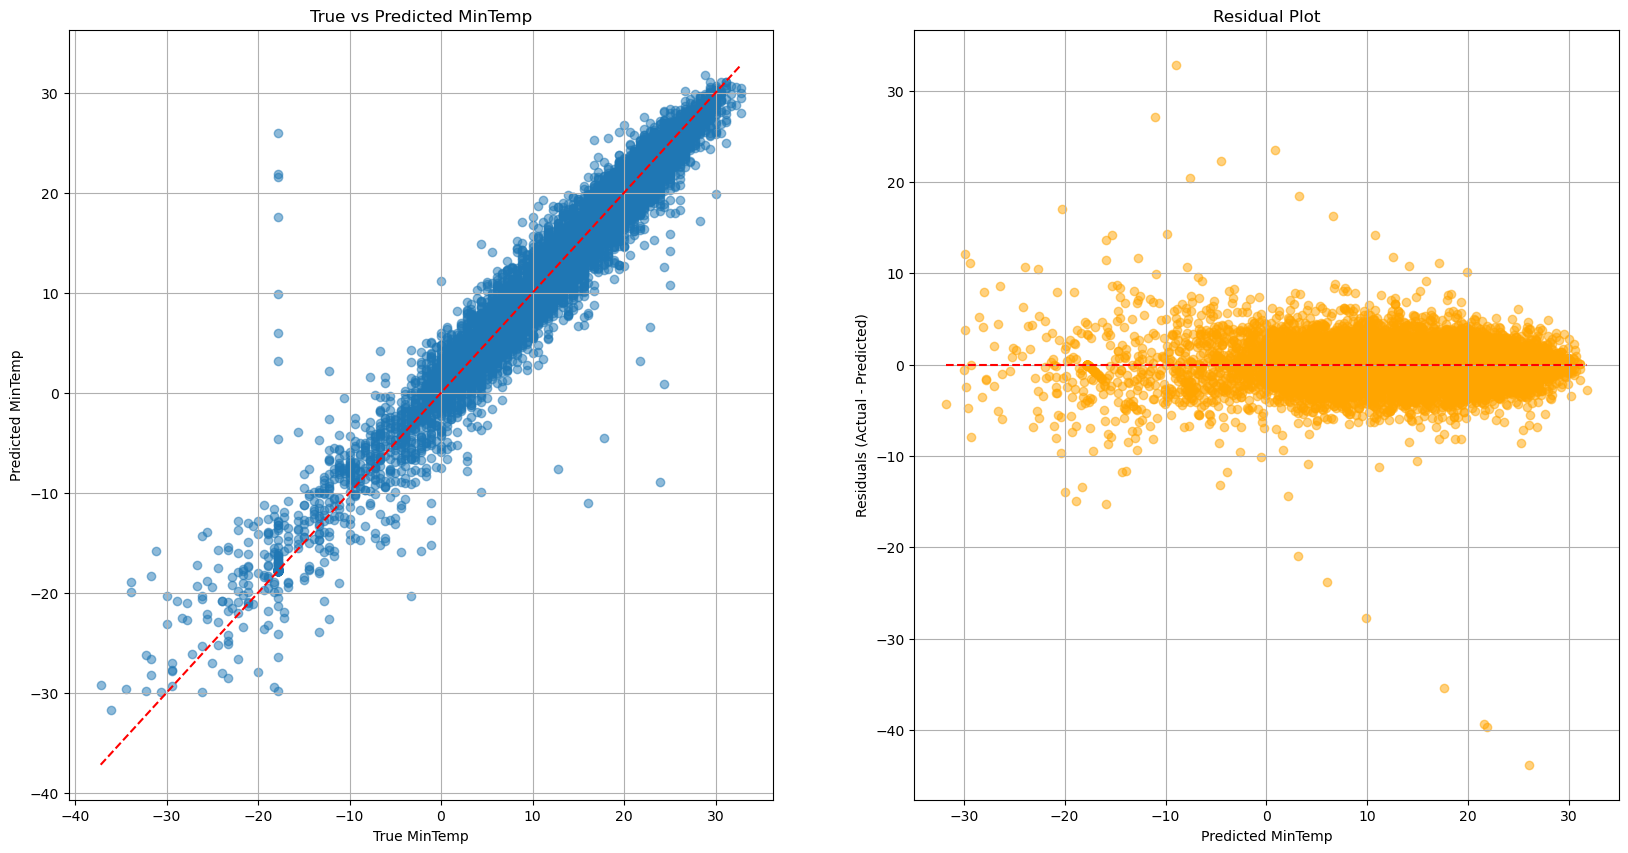

In [ ]:
# recreate the true vs predicted min temp, and residual plot
import matplotlib.pyplot as plt

y_pred = model9.predict(X_test_scaled)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

ax1.scatter(y_test, y_pred, alpha=0.5)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
ax1.set(title="True vs Predicted MinTemp", xlabel="True MinTemp", ylabel="Predicted MinTemp")
ax1.grid()

ax2.scatter(y_pred, residuals, alpha=0.5, color='orange')
ax2.hlines(0, y_pred.min(), y_pred.max(), colors='red', linestyles='--')
ax2.set(title="Residual Plot", xlabel="Predicted MinTemp", ylabel="Residuals (Actual - Predicted)")
ax2.grid(True)

### Observations:
Below, I've annotated over the two graphs on the features I've noticed from the two graphs. These annotations are colour coded. So each colour represents a specific point that I will be talking about in detail.

* <span style="color: red;"> **RED: Accurate prediction between -10c to 30c**</span>  
    * The model seems to do very well when predicting `Mintemp` that sits from -10c to 30c. The clustering is so dense that the perfect dotted line is completely surrounded by opaque blue dots. This is further confirmed with our residual plot. Where our distribution of prediction errors mostly stay within or under 5 celsius. 
    
    * We can also see how the accuracy of prediction seems to get even better the higher the temperature is, especially from 25c and above, as there's a noticeable taper. However I do notice that the model slightly underestimate the hottest temperature, when compared to the main body of the red circled area. Likely due to those very hot temperatures being outliers, and appearing infrequently in the data set. So it relies on what temperatures it has seen more often.

* <span style="color: green;"> **GREEN: Sparse prediction from -10c to -40c**</span>  
    * The model has a stronger struggle with any `Mintemp` being below -10c. As you can see the way the points are distributed, it appears to further expand and sparse outwards. Though looking at the residual plot, it has a somewhat bulge around -20c, before the dots somewhat converge back to the centre line. The likely reasoning again can be due to the lack of representation of such extreme outlying temperatures. The model hasn't had enough examples from these low temperatures to fully learn it's patterns.

    * The predictions also appear to overestimate temperature slightly, likely due to the model relying on the temperatures it has seen more often, rather than taking risks on information it has not yet fully learnt.

* <span style="color: purple;"> **PURPLE: The straight line or diagonal line**</span> 
    * There's a noticeable outlier feature on the graph, represented by a straight line, where the points sit somwhere around -18c on the mintemp graph. While it's represented as a diagonal line from residual graph. Our model seems to predict a variety of temperature values, despite 'true' temperature being around -18c. This is seen on residual, where it further increases the difference between prediction and truth, ending up with some of the highest residual values.

    * I'm unsure what may have caused this anomaly. My instinctive thought is probably a form of data corruption/unknown. Where the stations have a default value like '-18c' to be the placeholder of the `Mintemp`, due to it being missing or corrupted. Which unfortunately doesn't match the weather data that was collected for that day as well.

* <span style="color: yellow;"> **YELLOW: The crescent-shaped outliers**</span> 
    * Another outlier is this crescent-shaped plotted dots. I would be inclined to belive that they are some outlier weather data, where the information indicated, suggests the `Mintemp` to be cold. But in reality was warmer than actually estimated. These could be the 'randomness' that the model was unable to find patterns for, or there could be other weather features that may have helped identify the `Mintemp`.

![alt text](annotated.PNG)